In [2]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [77]:
train = pd.read_csv('d1.csv')
#test = pd.read_csv('d2.csv')

In [78]:
#test_y = test['Degradation rate'].values
#x_time = test['Illumination time']

In [79]:
#test.drop(columns='Degradation rate', axis=1, inplace=True)

In [80]:
number_col = [ col for col in train.columns if train[col].dtype != 'object']

category_col = [ col for col in train.columns if train[col].dtype == 'object']

In [81]:
LE = LabelEncoder()

for col in category_col:
    train[col] = LE.fit_transform(train[col])
#    test[col] = LE.fit_transform(test[col])
    

In [82]:
x = train.drop(columns='Degradation rate', axis=1).values
y = train['Degradation rate'].values

In [83]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, shuffle=True,random_state=42)

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

kf = KFold(n_splits=10)
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []
i = 0
#for train_indices, test_indices in kf.split(xtrain):
#    x_train, x_test = xtrain[train_indices], xtrain[test_indices]
#    y_train, y_test = ytrain[train_indices], ytrain[test_indices]
#    i=i+1


    train_data = lgb.Dataset(x_train, label=y_train) 
    test_data = lgb.Dataset(x_test, label=y_test, reference=train_data) 

    
    params = {
        'objective' : 'regression', 
        'metric' : 'rmse', 
        'learning_rate':0.1, 
        'max_depth': 20, 
        'num_leaves' : 70, 
        'min_data_in_leaf' : 10
    }

    model = lgb.train(params=params,
                     train_set=train_data,
                     num_boost_round=300,
                     early_stopping_rounds=30,
                     valid_names=['test'],
                     valid_sets=[test_data])
    
    y_pred = model.predict(x_test)
#     MSE = mean_squared_error(np.log(y_test), np.log(y_pred))
#     RMSE = np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred)))
#     MAE = mean_absolute_error(np.log(y_test), np.log(y_pred))
    R2 = r2_score(y_test,y_pred)
#     mse_scores.append(MSE)
#     rmse_scores.append(RMSE)
#     mae_scores.append(MAE)
    r2_scores.append(R2) 
      
# print(f'MSE: {np.mean(mse_scores)}')
# print(f'RMSE: {np.mean(rmse_scores)}')
# print(f'MAE: {np.mean(mae_scores)}')
print(f'R2: {np.mean(r2_scores)}')




[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 463, number of used features: 9
[LightGBM] [Info] Start training from score 62.766933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	test's rmse: 29.7835
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	test's rmse: 28.4848
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	test's rmse: 27.0074
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	test's rmse: 25.7224
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	test's rmse: 24.8101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	test's rmse: 23.55

[101]	test's rmse: 9.42362
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[102]	test's rmse: 9.39791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[103]	test's rmse: 9.38886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[104]	test's rmse: 9.37163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[105]	test's rmse: 9.36413
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[106]	test's rmse: 9.34187
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[107]	test's rmse: 9.33307
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[108]	test's rmse: 9.33533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[109]	test's rmse: 9.29654
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	test's rmse: 9.28563
[LightGBM] [Warning] No further splits with positive ga

[191]	test's rmse: 8.38502
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[192]	test's rmse: 8.38561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[193]	test's rmse: 8.37868
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[194]	test's rmse: 8.39032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[195]	test's rmse: 8.39108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[196]	test's rmse: 8.39469
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[197]	test's rmse: 8.37564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[198]	test's rmse: 8.3826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[199]	test's rmse: 8.39204
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	test's rmse: 8.38444
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[278]	test's rmse: 8.01379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[279]	test's rmse: 8.01602
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[280]	test's rmse: 8.01688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[281]	test's rmse: 8.02191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[282]	test's rmse: 8.01808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[283]	test's rmse: 8.00928
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[284]	test's rmse: 8.00371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[285]	test's rmse: 7.99556
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[286]	test's rmse: 7.98838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[287]	t

[58]	test's rmse: 9.52915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[59]	test's rmse: 9.46371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	test's rmse: 9.38508
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[61]	test's rmse: 9.30623
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[62]	test's rmse: 9.22814
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[63]	test's rmse: 9.14714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[64]	test's rmse: 9.15532
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[65]	test's rmse: 9.06751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[66]	test's rmse: 9.02472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[67]	test's rmse: 9.00169
[LightGBM] [Warning] No further splits with positive gain, best g

[165]	test's rmse: 7.29916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[166]	test's rmse: 7.30241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[167]	test's rmse: 7.30344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[168]	test's rmse: 7.31341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[169]	test's rmse: 7.27658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[170]	test's rmse: 7.26993
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[171]	test's rmse: 7.25691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[172]	test's rmse: 7.2714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[173]	test's rmse: 7.26563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[174]	test's rmse: 7.25618
[LightGBM] [Warning] No further splits with positive gai

[264]	test's rmse: 6.81607
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[265]	test's rmse: 6.8179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[266]	test's rmse: 6.80882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[267]	test's rmse: 6.79852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[268]	test's rmse: 6.80022
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[269]	test's rmse: 6.7987
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[270]	test's rmse: 6.80052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[271]	test's rmse: 6.78442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[272]	test's rmse: 6.78276
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[273]	test's rmse: 6.77764
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[49]	test's rmse: 11.5846
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	test's rmse: 11.5364
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[51]	test's rmse: 11.4732
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	test's rmse: 11.4102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[53]	test's rmse: 11.2904
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[54]	test's rmse: 11.2214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[55]	test's rmse: 11.2038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[56]	test's rmse: 11.0925
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[57]	test's rmse: 11.019
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[58]	test's rmse:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[145]	test's rmse: 8.9143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[146]	test's rmse: 8.9093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[147]	test's rmse: 8.9135
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[148]	test's rmse: 8.92156
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[149]	test's rmse: 8.92478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[150]	test's rmse: 8.92625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[151]	test's rmse: 8.91546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[152]	test's rmse: 8.89157
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[153]	test's rmse: 8.88233
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[154]	test

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[247]	test's rmse: 8.41729
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[248]	test's rmse: 8.39395
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[249]	test's rmse: 8.3925
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[250]	test's rmse: 8.39899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[251]	test's rmse: 8.38333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[252]	test's rmse: 8.38062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[253]	test's rmse: 8.3835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[254]	test's rmse: 8.3767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[255]	test's rmse: 8.37383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[256]	test

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[56]	test's rmse: 15.6793
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[57]	test's rmse: 15.6851
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[58]	test's rmse: 15.6894
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[59]	test's rmse: 15.6819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	test's rmse: 15.6349
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[61]	test's rmse: 15.6151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[62]	test's rmse: 15.6076
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[63]	test's rmse: 15.5952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[64]	test's rmse: 15.5661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[65]	test's rmse

[153]	test's rmse: 13.9617
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[154]	test's rmse: 13.9509
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[155]	test's rmse: 13.9451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[156]	test's rmse: 13.9187
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[157]	test's rmse: 13.905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[158]	test's rmse: 13.9028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[159]	test's rmse: 13.8921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[160]	test's rmse: 13.882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[161]	test's rmse: 13.8746
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[162]	test's rmse: 13.8669
[LightGBM] [Warning] No further splits with positive gain

[242]	test's rmse: 13.4675
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[243]	test's rmse: 13.4666
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[244]	test's rmse: 13.4717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[245]	test's rmse: 13.4636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[246]	test's rmse: 13.4612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[247]	test's rmse: 13.4536
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[248]	test's rmse: 13.4335
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[249]	test's rmse: 13.4321
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[250]	test's rmse: 13.427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[251]	test's rmse: 13.4228
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[28]	test's rmse: 13.5896
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[29]	test's rmse: 13.3933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	test's rmse: 13.2783
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[31]	test's rmse: 13.1368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[32]	test's rmse: 13.0502
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[33]	test's rmse: 12.967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[34]	test's rmse: 12.8473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[35]	test's rmse: 12.7538
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[36]	test's rmse: 12.6551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[37]	test's rmse:

[109]	test's rmse: 9.44786
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	test's rmse: 9.43091
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[111]	test's rmse: 9.44505
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[112]	test's rmse: 9.41585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[113]	test's rmse: 9.38743
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[114]	test's rmse: 9.3694
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[115]	test's rmse: 9.37518
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[116]	test's rmse: 9.3503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[117]	test's rmse: 9.36561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[118]	test's rmse: 9.32238
[LightGBM] [Warning] No further splits with positive gain

[196]	test's rmse: 8.37971
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[197]	test's rmse: 8.35681
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[198]	test's rmse: 8.35517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[199]	test's rmse: 8.36522
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	test's rmse: 8.36069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[201]	test's rmse: 8.348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[202]	test's rmse: 8.34666
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[203]	test's rmse: 8.34046
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[204]	test's rmse: 8.33342
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[205]	test's rmse: 8.31757
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 464, number of used features: 9
[LightGBM] [Info] Start training from score 62.302112
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	test's rmse: 26.2044
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	test's rmse: 24.9765
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	test's rmse: 23.6706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	test's rmse: 22.5867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	test's rmse: 21.5633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	test's rmse: 20.68

[95]	test's rmse: 8.45025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[96]	test's rmse: 8.43963
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[97]	test's rmse: 8.40609
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[98]	test's rmse: 8.40301
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[99]	test's rmse: 8.39674
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	test's rmse: 8.39137
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[101]	test's rmse: 8.3643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[102]	test's rmse: 8.36039
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[103]	test's rmse: 8.34051
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[104]	test's rmse: 8.33133
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[177]	test's rmse: 7.77781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[178]	test's rmse: 7.76765
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[179]	test's rmse: 7.77138
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[180]	test's rmse: 7.7753
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[181]	test's rmse: 7.78003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[182]	test's rmse: 7.7682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[183]	test's rmse: 7.77983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[184]	test's rmse: 7.76697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[185]	test's rmse: 7.7618
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[186]	test

[89]	test's rmse: 12.6771
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	test's rmse: 12.6535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[91]	test's rmse: 12.5754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[92]	test's rmse: 12.5843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[93]	test's rmse: 12.5873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[94]	test's rmse: 12.5118
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[95]	test's rmse: 12.5273
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[96]	test's rmse: 12.4587
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[97]	test's rmse: 12.4499
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[98]	test's rmse: 12.3725
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[173]	test's rmse: 11.0694
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[174]	test's rmse: 11.0508
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[175]	test's rmse: 11.0615
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[176]	test's rmse: 11.0577
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[177]	test's rmse: 11.0496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[178]	test's rmse: 11.0396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[179]	test's rmse: 11.0095
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[180]	test's rmse: 10.9745
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[181]	test's rmse: 10.9712
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[182]	t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[258]	test's rmse: 10.247
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[259]	test's rmse: 10.2192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[260]	test's rmse: 10.2232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[261]	test's rmse: 10.2054
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[262]	test's rmse: 10.1755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[263]	test's rmse: 10.1807
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[264]	test's rmse: 10.1655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[265]	test's rmse: 10.1676
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[266]	test's rmse: 10.179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[267]	tes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[34]	test's rmse: 14.3551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[35]	test's rmse: 14.2379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[36]	test's rmse: 14.1438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[37]	test's rmse: 14.0131
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[38]	test's rmse: 13.9453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[39]	test's rmse: 13.8049
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	test's rmse: 13.6087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[41]	test's rmse: 13.4089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[42]	test's rmse: 13.3288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[43]	test's rmse

[119]	test's rmse: 9.18401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[120]	test's rmse: 9.1829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[121]	test's rmse: 9.1285
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[122]	test's rmse: 9.07833
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[123]	test's rmse: 9.04567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[124]	test's rmse: 9.01473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[125]	test's rmse: 8.98916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[126]	test's rmse: 8.94758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[127]	test's rmse: 8.92602
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[128]	test's rmse: 8.90241
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[219]	test's rmse: 7.41662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[220]	test's rmse: 7.40575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[221]	test's rmse: 7.3997
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[222]	test's rmse: 7.40765
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[223]	test's rmse: 7.3945
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[224]	test's rmse: 7.37286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[225]	test's rmse: 7.34438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[226]	test's rmse: 7.32041
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[227]	test's rmse: 7.30183
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[228]	tes

[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data points in the train set: 464, number of used features: 9
[LightGBM] [Info] Start training from score 62.819763
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	test's rmse: 26.3756
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	test's rmse: 25.1666
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	test's rmse: 23.9517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	test's rmse: 22.9496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	test's rmse: 22.1124
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	test's rmse: 21.4023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7]	test's rmse: 20.9023
[LightGBM] [Warning] No further splits with positive gain, bes

[105]	test's rmse: 10.1266
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[106]	test's rmse: 10.1297
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[107]	test's rmse: 10.0804
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[108]	test's rmse: 10.0648
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[109]	test's rmse: 10.0519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	test's rmse: 10.0279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[111]	test's rmse: 9.99126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[112]	test's rmse: 9.97344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[113]	test's rmse: 9.97374
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[114]	test's rmse: 9.95398
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[189]	test's rmse: 9.51898
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[190]	test's rmse: 9.52136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[191]	test's rmse: 9.50041
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[192]	test's rmse: 9.49683
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[193]	test's rmse: 9.48917
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[194]	test's rmse: 9.49389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[195]	test's rmse: 9.49653
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[196]	test's rmse: 9.4897
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[197]	test's rmse: 9.48562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[198]	te

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[270]	test's rmse: 9.29537
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[271]	test's rmse: 9.29037
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[272]	test's rmse: 9.28075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[273]	test's rmse: 9.28789
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[274]	test's rmse: 9.29343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[275]	test's rmse: 9.28923
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[276]	test's rmse: 9.29047
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[277]	test's rmse: 9.29473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[278]	test's rmse: 9.28479
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[279]	t

[67]	test's rmse: 15.2817
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[68]	test's rmse: 15.2264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[69]	test's rmse: 15.1548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	test's rmse: 15.1139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[71]	test's rmse: 15.0828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	test's rmse: 15.0089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	test's rmse: 14.9646
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	test's rmse: 14.9029
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	test's rmse: 14.8729
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[76]	test's rmse: 14.7994
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[174]	test's rmse: 12.8696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[175]	test's rmse: 12.8457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[176]	test's rmse: 12.8308
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[177]	test's rmse: 12.8334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[178]	test's rmse: 12.8291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[179]	test's rmse: 12.7932
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[180]	test's rmse: 12.7871
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[181]	test's rmse: 12.7862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[182]	test's rmse: 12.7662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[183]	t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[272]	test's rmse: 12.0566
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[273]	test's rmse: 12.0499
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[274]	test's rmse: 12.0428
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[275]	test's rmse: 12.0459
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[276]	test's rmse: 12.0503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[277]	test's rmse: 12.042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[278]	test's rmse: 12.0401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[279]	test's rmse: 12.0333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[280]	test's rmse: 12.033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[281]	tes

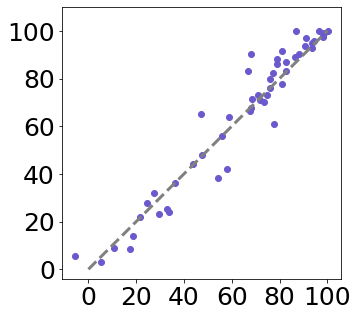

In [68]:
y_pred = model.predict(x_test)
plt.figure(figsize=(5,5))
plt.scatter(y_pred,y_test,color = '#6A5ACD')
plt.ylim((-4,110))
x = [0,100] 
y = x
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.plot(x,y,color = 'grey',linewidth = '3',linestyle='--')
#plt.ylabel('Degradation rate(%)-Experimental',fontsize=15)
#plt.xlabel('Degradation rate(%) \n LightGBM',fontsize=25)
#plt.savefig('lgb.jpg',bbox_inches = 'tight', dpi=300)

plt.show()

In [74]:
from sklearn.metrics import r2_score
ypred = model.predict(xtest)
#pred = model.predict(test.values)
r = r2_score(ypred,ytest)

0.9282475020237683

In [274]:
plt.rc('font',family='Times New Roman')

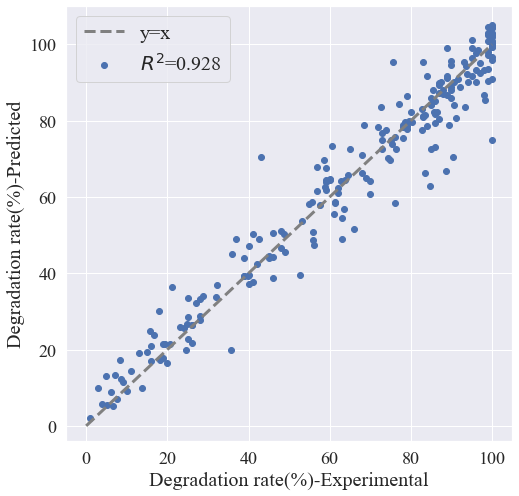

In [275]:
plt.figure(figsize=(8,8))
plt.scatter(ytest,ypred)
plt.ylim((-4,110))
x = [0,100] 
y = x
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.plot(x,y,color = 'grey',linewidth = '3',linestyle='--')
plt.legend(labels=['y=x', r"$R^2$=0.928"],fontsize=20)
plt.xlabel('Degradation rate(%)-Experimental',fontsize=20)
plt.ylabel('Degradation rate(%)-Predicted',fontsize=20)
plt.savefig('a.jpg',bbox_inches = 'tight', dpi=600)

plt.show()

In [1]:
import seaborn as sns

In [277]:
from matplotlib.pyplot import MultipleLocator
y_major_locator=MultipleLocator(20)

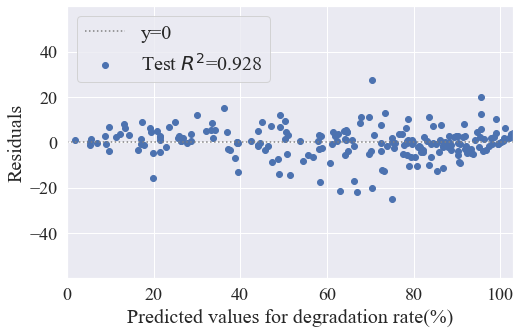

In [280]:
plt.figure(figsize=(8,5))
plt.xlim((0,103))
plt.ylim((-59.99, 59.99))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.scatter(ypred,ypred - ytest)
plt.axhline(y=0,ls=":",c="grey")
plt.legend(labels=['y=0' ,r"Test $R^2$=0.928"],fontsize=20)
ax = plt.gca()
ax.yaxis.set_major_locator(y_major_locator)
plt.xlabel('Predicted values for degradation rate(%)',fontsize=20)
plt.ylabel('Residuals',fontsize=20)
plt.savefig('b.jpg',bbox_inches = 'tight', dpi=600)


In [94]:
result = pd.DataFrame()
result['predicted'] = ypred
result['experimental'] = ytest
result.to_excel('1.xlsx')

In [117]:
feature_name = train.drop(columns='Degradation rate', axis=1).columns
importance = model.feature_importance(importance_type='split')
importance_train = pd.DataFrame()
importance_train['features'] = feature_name
importance_train['importance'] = importance
importance_train.sort_values('importance', ascending=False)

,features,importance
8,Illumination time,2876
1,Dopant/Ti mole ratio,2197
4,Catalyst/Pollutant mass ratio,1538
2,Calcination temperature,1167
7,Light wavelength,1148
0,Dopant,1038
5,pH,834
3,Pollutant,246
6,Experimental temperature,236


<Figure size 864x432 with 0 Axes>

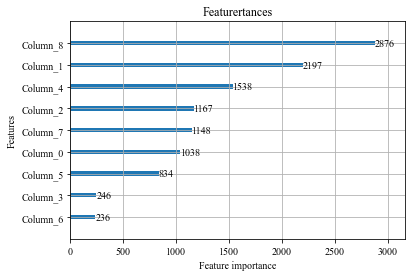

In [116]:
plt.figure(figsize=(12,6))
lgb.plot_importance(model, max_num_features=30)
plt.title("Featurertances")
plt.show()

In [115]:
colors = ['windows blue', 'amber' ,'greyish','beige', 'dusty purple','peach' , 'faded green', 'salmon', 'silver']
pla = sns.xkcd_palette(colors)

[(0.21568627450980393, 0.47058823529411764, 0.7490196078431373),
 (0.996078431372549, 0.7019607843137254, 0.03137254901960784),
 (0.6588235294117647, 0.6431372549019608, 0.5843137254901961),
 (0.9019607843137255, 0.8549019607843137, 0.6509803921568628),
 (0.5098039215686274, 0.37254901960784315, 0.5294117647058824),
 (1.0, 0.6901960784313725, 0.48627450980392156),
 (0.4823529411764706, 0.6980392156862745, 0.4549019607843137),
 (1.0, 0.4745098039215686, 0.4235294117647059),
 (0.7725490196078432, 0.788235294117647, 0.7803921568627451)]

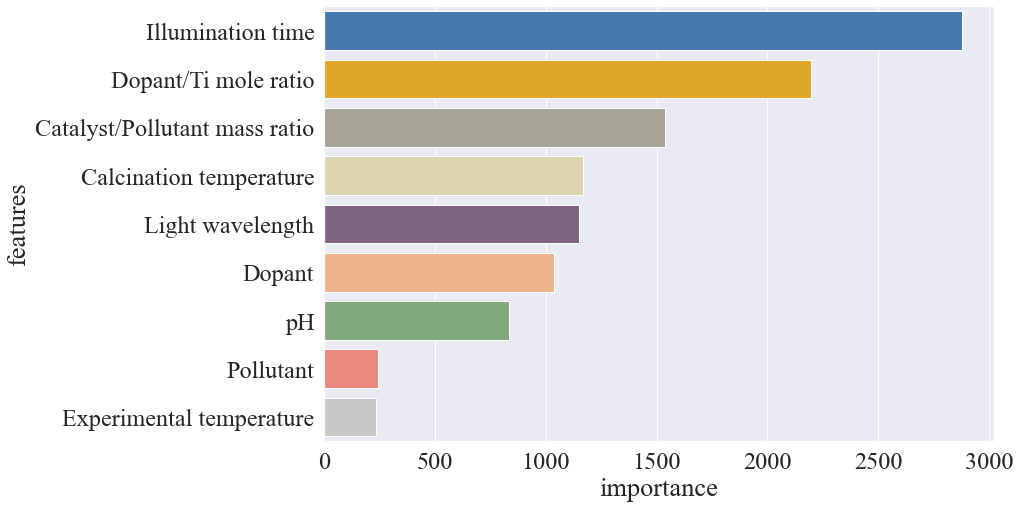

In [253]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.set(font='Times New Roman', font_scale=2.2)

sns.barplot(data=importance_train.sort_values('importance', ascending=False),x='importance',y='features',palette= pla)
plt.savefig('imp.jpg',bbox_inches = 'tight', dpi=600)
plt.show()